In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn


In [10]:
def read_molecules(filename):
    from openeye import oechem
    molecules = list()
    mol = oechem.OEGraphMol()
    with oechem.oemolistream(filename) as ifs:
        while oechem.OEReadMolecule(ifs, mol):
            molecules.append( oechem.OEGraphMol(mol) )

    return molecules

In [16]:
molecules = read_molecules('docked/sprint-14-P0008_0A-dimer-His41(0)-Cys145(0)-His163(0).sdf')

In [36]:
def extract_scores(molecules):
    from openeye import oechem
    scores = dict()
    for molecule in molecules:
        title = molecule.GetTitle()
        score = float(oechem.OEGetSDData(molecule, 'docking_score'))
        # Filter out crazy scores
        if score < 0.0:
            scores[title] = score
    return scores

In [37]:
scores = extract_scores(molecules)

In [52]:
libraries = ['amidation', 'red_ami', 'mitsunobu', 'williamson_ether', 'red_amination_1']

In [53]:
library_scores = { library : list() for library in libraries }
for library in libraries:
    for title, score in scores.items():
        if f'{library}-' in title:
            library_scores[library].append(score)

/Users/choderaj/miniconda/envs/fah-xchem/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/choderaj/miniconda/envs/fah-xchem/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/choderaj/miniconda/envs/fah-xchem/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

amidation : 8978
red_ami : 6712
mitsunobu : 667
williamson_ether : 1281
red_amination_1 : 383


/Users/choderaj/miniconda/envs/fah-xchem/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/choderaj/miniconda/envs/fah-xchem/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'docking score')

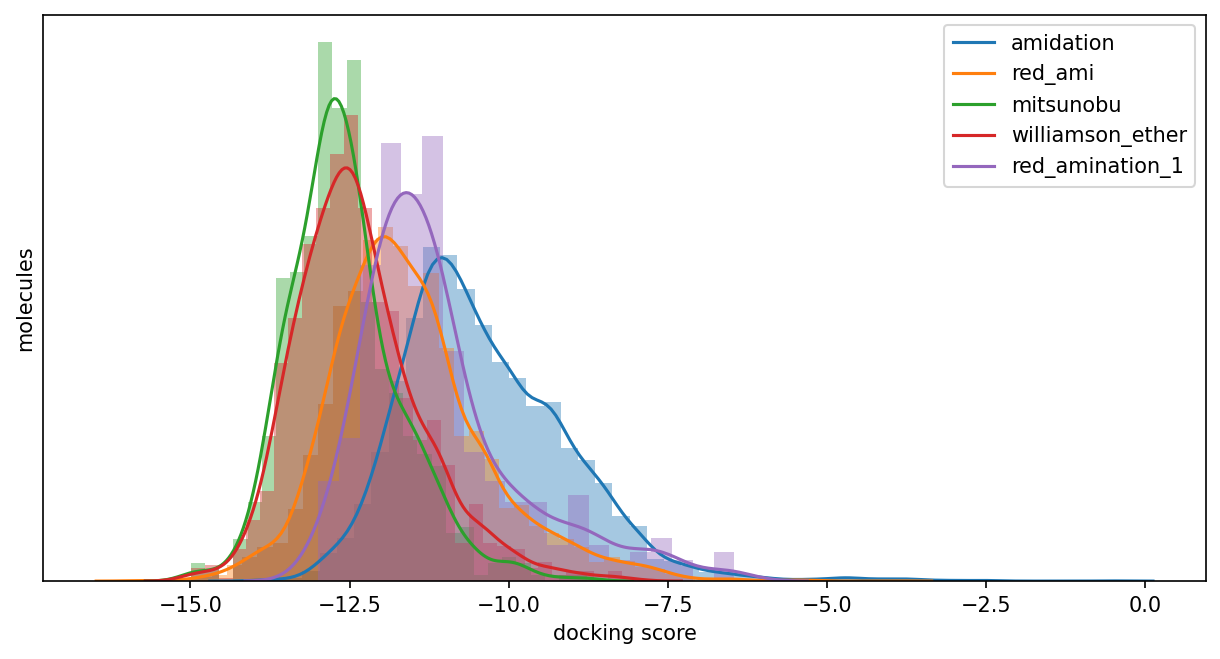

In [57]:
import seaborn as sns
fig = plt.figure(figsize=[10,5], dpi=150)
for library in libraries:
    sns.distplot(library_scores[library]);
    print(f'{library} : {len(library_scores[library])}')
plt.legend(libraries);
plt.yticks([]);
plt.ylabel('molecules')
plt.xlabel('docking score')

In [62]:
from openeye import oechem
molecules.sort(key=lambda m : float(oechem.OEGetSDData(m, 'docking_score')))

In [63]:
with oechem.oemolostream('sorted-docked.sdf') as ofs:
    for molecule in molecules:
        oechem.OEWriteMolecule(ofs, molecule)